**What is Feature Selection?**
 
        Feature selection is the process of choosing the most important features (variables) from a dataset to improve a machine learning model's performance and efficiency. Instead of using all the features, we select only the most relevant ones that contribute significantly to predictions.

**Why Do We Need Feature Selection?**

*1.Reduces Overfitting 📉*
 
        Too many irrelevant features can make a model complex and cause it to overfit the training data.
*2.Improves Model Performance 🚀*
 
        Selecting relevant features boosts accuracy and reduces unnecessary noise in the data.
*3.Reduces Training Time ⏳*
 
        Fewer features mean faster model training and lower computational cost.
*4.Enhances Interpretability 🔍*
 
        Helps in understanding which features actually impact predictions.
        
**Types of Feature Selection Methods**

<ins>*Type => Filter Methods:*</ins> 

Method => Correlation, Chi-Square, Mutual Information.
 
Description => Rank features based on statistical tests.

<ins>*Type => Wrapper Methods:*</ins> 

Method => Forward/Backward Selection, Recursive Feature Elimination (RFE)

Description => Train models with different feature subsets and select the best.

<ins>*Type => Embedded Methods*</ins>  

 
Method =>Lasso Regression, Decision Trees
 
Description =>Feature selection is built into the model training process.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model  import Lasso
from sklearn.feature_selection import RFE

In [8]:
np.random.seed(42)
data=pd.DataFrame({
    'Size' : np.random.randint(1000,5000,100),  
    'Bedrooms' : np.random.randint(1,5,100), 
    'Age' : np.random.randint(1,50,100), 
    'Price' : np.random.randint(100000,500000,100)  
})
print(data.head())

   Size  Bedrooms  Age   Price
0  4174         2   32  486393
1  4507         2   39  134754
2  1860         4   49  326814
3  2294         2   32  337714
4  2130         2    4  242483


***Filter Method***

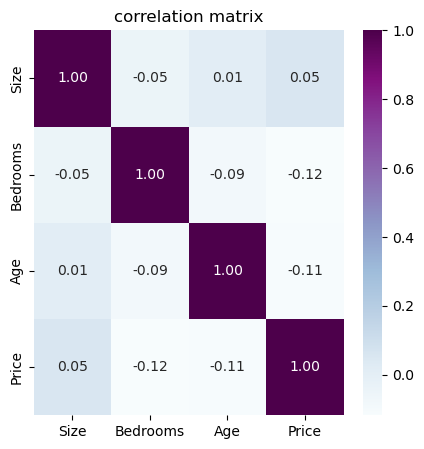

In [14]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(),annot=True,cmap='BuPu',fmt=".2f")
plt.title("correlation matrix")
plt.show()

***Wrapper Method***

In [16]:
x=data.drop(columns=['Price'])
y=data['Price']
model = RandomForestRegressor()
rfe=RFE(model,n_features_to_select=2)
x_sel=rfe.fit_transform(x,y)
print('Selected features using rfe:',x.columns[rfe.support_])

Selected features using rfe: Index(['Size', 'Age'], dtype='object')


***Embedded Method***

In [17]:
lasso=Lasso(alpha=0.1)
lasso.fit(x,y)
imp=np.abs(lasso.coef_)

sel_fea=x.columns[imp>0]
print('Selected features using lasso:',sel_fea)

Selected features using lasso: Index(['Size', 'Bedrooms', 'Age'], dtype='object')


In [ ]:
import matplotlib.pyplot as plt 
from sklearn.linear_model  import Lasso